In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data, wb
import datetime

In [13]:
#Use the Pandas Data Reader to go to Yahoo Finance and pull back the Open, High, Low, Adjusted Close, and SPY Adjusted Close
##From Start Date and End Date passed to the function
def create_df(start_date, end_date, sym):
    start_date = str(start_date)
    end_date = str(end_date)
    df = pd.date_range(start_date, end_date)
    df1 = data.DataReader(sym, 'yahoo', '2015-01-01', datetime.datetime.today())
    spy = data.DataReader('spy', 'yahoo', '2015-01-01', datetime.datetime.today())
    df_temp = spy['Adj Close']
    df_temp = pd.DataFrame(df_temp)
    df_temp = df_temp.rename(columns={'Adj Close' : 'SPY'})
    df1 = df1.join(df_temp, how='inner')
    df1 = df1.drop(['Close', 'Volume'], axis=1)
    df1 = df1.sort_index(ascending=True)             
    return df1
stock = 'GOOG'
#test = create_df('2015-01-01', datetime.datetime.today(), stock)
#test.head()

In [14]:
#Get Normalize the DF dividing each value by the values in the first row.
def normalize_df(df):
    return df / df.ix[0, :]  
#normalize_df(test)

In [8]:
def get_first_row(series):
    multiplier = []
    for value in series.ix[0:1]:
        multiplier.append(series.ix[0:1][value][0])
    return multiplier

In [15]:
def create_bollinger(df, skip=20):
    df['rolling_mean'] = pd.rolling_mean(df['Adj Close'], skip)
    df['bolliner_high'] = df['rolling_mean'] + (2 * pd.rolling_std(df['Adj Close'], skip))
    df['bolliner_low'] = df['rolling_mean'] - (2 * pd.rolling_std(df['Adj Close'], skip))
    return df
#create_bollinger(test)

In [12]:
#Make New Column for Supervised Learning to create a target value "shift" number of days in the future
def make_target(df, shift=4):
    df['target'] = df['Adj Close'].shift(-(shift), axis=0)
    return df
#make_target(test)

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  from ipykernel import kernelapp as app
/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  app.launch_new_instance()
/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


,Open,High,Low,Adj Close,SPY,rolling_mean,bolliner_high,bolliner_low,target
Date,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,0.976388,1.031915,0.920860,0.957832
2015-01-05,0.989131,0.986937,0.978935,0.979154,0.981940,0.976388,1.031915,0.920860,0.945428
2015-01-06,0.973517,0.971587,0.956020,0.956460,0.972691,0.976388,1.031915,0.920860,0.938530
2015-01-07,0.958394,0.954776,0.953349,0.954822,0.984812,0.976388,1.031915,0.920860,0.945447
2015-01-08,0.941362,0.947691,0.936844,0.957832,1.002288,0.976388,1.031915,0.920860,0.954383
2015-01-09,0.954160,0.950402,0.944076,0.945428,0.994256,0.976388,1.031915,0.920860,0.956136
2015-01-12,0.935597,0.933567,0.930280,0.938530,0.986467,0.976388,1.031915,0.920860,0.968122
2015-01-13,0.942969,0.946750,0.939496,0.945447,0.983693,0.976388,1.031915,0.920860,0.965873
2015-01-14,0.935048,0.947221,0.940660,0.954383,0.977754,0.976388,1.031915,0.920860,0.987100


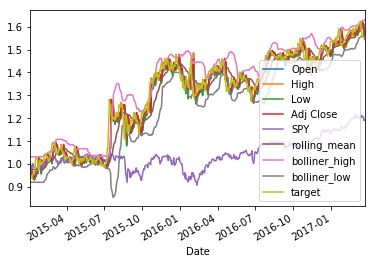

In [16]:
#Call Functions to get a normalized Data Frame which is ready for modeling
def orchestrator(stock):
    raw_df = create_df('2015-01-01', datetime.datetime.today(), stock)
    multiplier = get_first_row(raw_df)
    normalized = normalize_df(raw_df)
    normalized = create_bollinger(normalized)
    normalized = make_target(normalized)
    #Fill In Values for rolling metrics using backward fill
    normalized = normalized.fillna(method='bfill')
    normalized = normalized.fillna(method='ffill')
    normalized.plot()
    return normalized, multiplier
stock = 'GOOG'
df, multiplier = orchestrator(stock)
df
